<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.207469,95.932431,-0.002775,202.137125,202.156057,-0.018932
1,0.0,1.0,79.042355,60.819782,-0.006598,149.855539,149.866729,-0.011190
2,0.0,2.0,74.360900,80.359205,-0.014516,164.705590,164.728483,-0.022893
3,0.0,3.0,21.851226,41.321105,-0.030760,73.141570,73.161626,-0.020056
4,0.0,4.0,20.744127,94.895263,0.007639,125.647028,125.641249,0.005779
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.494587,94.845130,-0.002980,135.336736,135.346736,-0.010000
19996,999.0,16.0,99.668564,28.379722,-0.041797,138.006489,138.029003,-0.022514
19997,999.0,17.0,66.363078,65.575855,0.021840,141.960774,141.934525,0.026248
19998,999.0,18.0,75.553005,46.706909,-0.006521,132.253393,132.247740,0.005653


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.207469  95.932431 -0.002775  202.137125  202.156057 -0.018932
      1.0    79.042355  60.819782 -0.006598  149.855539  149.866729 -0.011190
      2.0    74.360900  80.359205 -0.014516  164.705590  164.728483 -0.022893
      3.0    21.851226  41.321105 -0.030760   73.141570   73.161626 -0.020056
      4.0    20.744127  94.895263  0.007639  125.647028  125.641249  0.005779
...                ...        ...       ...         ...         ...       ...
999.0 15.0   30.494587  94.845130 -0.002980  135.336736  135.346736 -0.010000
      16.0   99.668564  28.379722 -0.041797  138.006489  138.029003 -0.022514
      17.0   66.363078  65.575855  0.021840  141.960774  141.934525  0.026248
      18.0   75.553005  46.706909 -0.006521  132.253393  132.247740  0.005653
      19.0   67.350206  97.225176 -0.004647  174.570735  174.584468 -0.013733

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.207469  95.932431 -0.002775  202.137125  202.156057 -0.018932
      1.0    79.042355  60.819782 -0.006598  149.855539  149.866729 -0.011190
      2.0    74.360900  80.359205 -0.014516  164.705590  164.728483 -0.022893
      3.0    21.851226  41.321105 -0.030760   73.141570   73.161626 -0.020056
      4.0    20.744127  94.895263  0.007639  125.647028  125.641249  0.005779
...                ...        ...       ...         ...         ...       ...
999.0 15.0   30.494587  94.845130 -0.002980  135.336736  135.346736 -0.010000
      16.0   99.668564  28.379722 -0.041797  138.006489  138.029003 -0.022514
      17.0   66.363078  65.575855  0.021840  141.960774  141.934525  0.026248
      18.0   75.553005  46.706909 -0.006521  132.253393  132.247740  0.005653
      19.0   67.350206  97.225176 -0.004647  174.570735  174.584468 -0.013733

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.207469,95.932431,-0.002775,202.137125,202.156057,-0.018932
1,0.0,1.0,79.042355,60.819782,-0.006598,149.855539,149.866729,-0.011190
2,0.0,2.0,74.360900,80.359205,-0.014516,164.705590,164.728483,-0.022893
3,0.0,3.0,21.851226,41.321105,-0.030760,73.141570,73.161626,-0.020056
4,0.0,4.0,20.744127,94.895263,0.007639,125.647028,125.641249,0.005779
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.494587,94.845130,-0.002980,135.336736,135.346736,-0.010000
19996,999.0,16.0,99.668564,28.379722,-0.041797,138.006489,138.029003,-0.022514
19997,999.0,17.0,66.363078,65.575855,0.021840,141.960774,141.934525,0.026248
19998,999.0,18.0,75.553005,46.706909,-0.006521,132.253393,132.247740,0.005653


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.207469  95.932431 -0.002775  202.137125  202.156057 -0.018932
      1.0    79.042355  60.819782 -0.006598  149.855539  149.866729 -0.011190
      2.0    74.360900  80.359205 -0.014516  164.705590  164.728483 -0.022893
      3.0    21.851226  41.321105 -0.030760   73.141570   73.161626 -0.020056
      4.0    20.744127  94.895263  0.007639  125.647028  125.641249  0.005779
...                ...        ...       ...         ...         ...       ...
999.0 15.0   30.494587  94.845130 -0.002980  135.336736  135.346736 -0.010000
      16.0   99.668564  28.379722 -0.041797  138.006489  138.029003 -0.022514
      17.0   66.363078  65.575855  0.021840  141.960774  141.934525  0.026248
      18.0   75.553005  46.706909 -0.006521  132.253393  132.247740  0.005653
      19.0   67.350206  97.225176 -0.004647  174.570735  174.584468 -0.013733

[20000 rows x 6 columns]

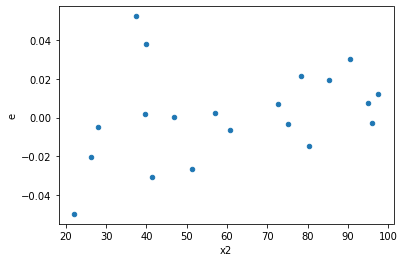

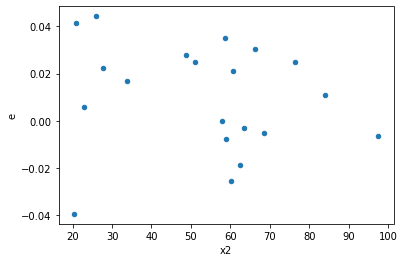

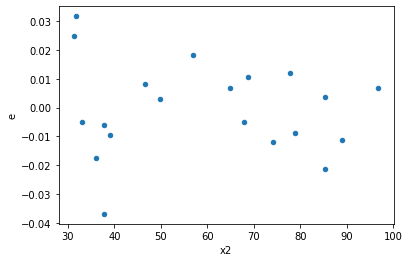

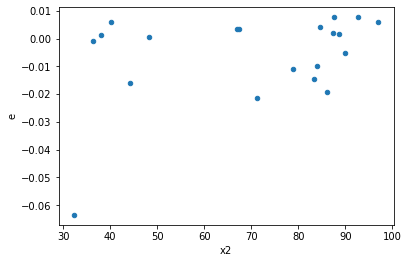

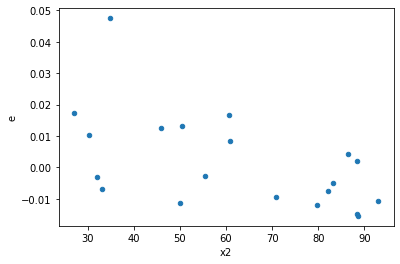

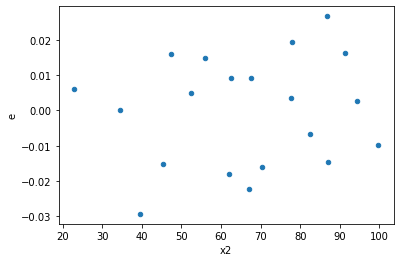

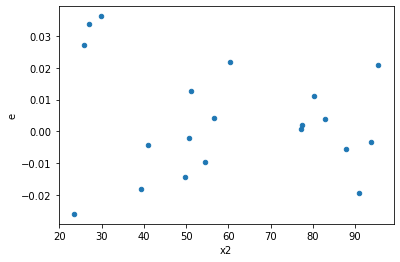

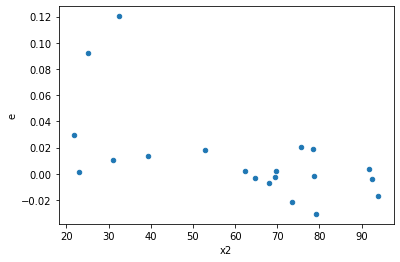

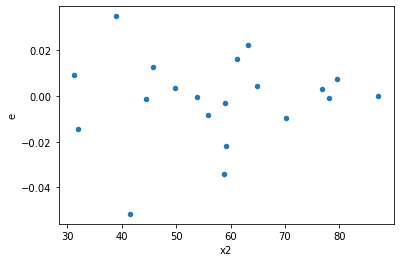

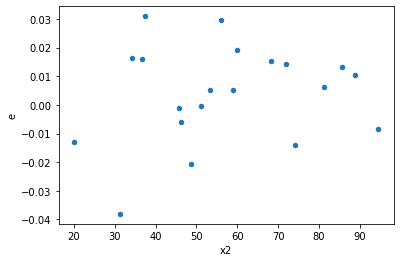

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,7.0,0.0034487810465698094,0.005312043947010019,0.00038319789406331215,0.0007588634210014312,1.9803434015638182,0.3798577209108662,0.8100711395445669,0.1899288604554331,Reject005=1 : Homoscedasticity
3.0,9.0,7.0,0.000989319934444987,0.0034299999668211327,0.00010992443716055412,0.0004899999952601618,4.4576074976347115,0.06150520305615825,0.9692473984719209,0.030752601528079127,Reject005=1 : Homoscedasticity
8.0,9.0,7.0,0.001974334127050311,0.004442784565782658,0.0002193704585611457,0.0006346835093975226,2.8932040966701797,0.17523646943357196,0.912381765283214,0.08761823471678598,Reject005=1 : Homoscedasticity
12.0,11.0,5.0,0.0028298311910527293,0.0022976505885203315,0.00025725738100479357,0.0004595301177040663,1.7862660185268064,0.5419715098080475,0.7290142450959762,0.27098575490402377,Reject005=1 : Homoscedasticity
13.0,5.0,11.0,0.0012822761173850615,0.00454100384239341,0.0002564552234770123,0.00041281853112667364,1.6097099740441714,0.473833362377724,0.763083318811138,0.236916681188862,Reject005=1 : Homoscedasticity
14.0,8.0,8.0,0.0032690315740588364,0.0045678815730728585,0.00040862894675735455,0.0005709851966341073,1.39731950260773,0.6472502706043128,0.6763748646978436,0.3236251353021564,Reject005=1 : Homoscedasticity
15.0,12.0,4.0,0.004892820744550527,0.010502687998490527,0.0004077350620458773,0.0026256719996226316,6.439652225265822,0.08622513713650104,0.9568874314317495,0.04311256856825052,Reject005=1 : Homoscedasticity
16.0,8.0,8.0,0.0021543520516698706,0.00547162111775431,0.00026929400645873383,0.0006839526397192888,2.539798968099561,0.208979374429761,0.8955103127851195,0.1044896872148805,Reject005=1 : Homoscedasticity
17.0,5.0,11.0,0.00014315758694342386,0.0006838565368234947,2.8631517388684773e-05,6.216877607486315e-05,2.1713405975274074,0.2637596594059448,0.8681201702970276,0.1318798297029724,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,7.0,0.006858539686512887,0.0014925475548856677,0.0007620599651680985,0.0002132210792693811,0.2797956709644862,0.07974528066381972,Reject005=1 : Homoscedasticity
1.0,9.0,7.0,0.0034487810465698094,0.005312043947010019,0.00038319789406331215,0.0007588634210014312,1.9803434015638182,0.3798577209108662,Reject005=1 : Homoscedasticity
2.0,6.0,10.0,0.001438080969269195,0.001981842684999775,0.00023968016154486585,0.0001981842684999775,0.8268697218099934,0.8507457751144066,Reject005=1 : Homoscedasticity
3.0,9.0,7.0,0.000989319934444987,0.0034299999668211327,0.00010992443716055412,0.0004899999952601618,4.4576074976347115,0.06150520305615825,Reject005=1 : Homoscedasticity
4.0,12.0,4.0,0.0023268643936044183,0.0003840387733752915,0.00019390536613370153,9.600969334382287e-05,0.49513685597345625,0.311167999743174,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,0.0020439381088387023,0.0019382424456086185,0.0002554922636048378,0.00024228030570107732,0.9482882271371043,0.9419799164609372,Reject005=1 : Homoscedasticity
6.0,11.0,5.0,0.004650961218580149,0.00041306366285842676,0.000422814656234559,8.261273257168535e-05,0.19538758024001757,0.02285569225065086,Reject005=0 : Heteroscedasticity
7.0,13.0,3.0,0.01376691915157365,0.0009619605378890328,0.0010589937808902809,0.0003206535126296776,0.30279074194383726,0.10880885296855991,Reject005=1 : Homoscedasticity
8.0,9.0,7.0,0.001974334127050311,0.004442784565782658,0.0002193704585611457,0.0006346835093975226,2.8932040966701797,0.17523646943357196,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      641
Reject005=0 : Heteroscedasticity    359
Name: Result_test, dtype: int64